In [1]:
! pip3 install chembl_webresource_client
# Downloads the CHEMBL drug database. 


  Using cached chembl-webresource-client-0.10.2.tar.gz (51 kB)
  Using cached requests_cache-0.5.2-py2.py3-none-any.whl (22 kB)
  Using cached easydict-1.9.tar.gz (6.4 kB)
  Created wheel for chembl-webresource-client: filename=chembl_webresource_client-0.10.2-py3-none-any.whl size=55661 sha256=692349d2287db4fdedab59f623537fceda7f0cd120accefacb4be152ae1aaa5f
  Stored in directory: /home/perry/.cache/pip/wheels/21/8c/3d/62f69d35e4b72cf761eff44234bbe2dcef1c615d4032dee84e
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=54c0bc35b75bdce32a7559973bf0aac859fed9b1f38a89febf37914e31316fc1
  Stored in directory: /home/perry/.cache/pip/wheels/5d/79/e4/4e55effe206295359b37e0f9db3e68a1197ba396682807dadb
Successfully built chembl-webresource-client easydict


In [7]:
! conda install --yes pandas

Solving environment: done

# All requested packages already installed.



In [38]:
import  pandas as pd
from chembl_webresource_client.new_client import new_client

In [9]:
# Searching for coronavirus
target_protein = new_client.target
search_query = target_protein.search('coronavirus')
target_proteins = pd.DataFrame.from_dict(search_query)
target_proteins

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,14.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,14.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859
5,[],Middle East respiratory syndrome-related coron...,Middle East respiratory syndrome-related coron...,9.0,False,CHEMBL4296578,[],ORGANISM,1335626
6,"[{'xref_id': 'P0C6X7', 'xref_name': None, 'xre...",SARS coronavirus,Replicase polyprotein 1ab,5.0,False,CHEMBL5118,"[{'accession': 'P0C6X7', 'component_descriptio...",SINGLE PROTEIN,227859


In [10]:
# narrow down to select proteins only
proteins = target_proteins.target_chembl_id[4]
proteins

'CHEMBL3927'

# retrieving bioactivity data for coronavirus proteinase with nanomolar unit of IC_50

In [11]:
protactivity = new_client.activity
bioactive = protactivity.filter(target_chembl_id=proteins).filter(standard_type = 'IC50')


In [12]:
df = pd.DataFrame.from_dict(bioactive)


df.head(3)


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [13]:
df.standard_type.unique()

array(['IC50'], dtype=object)

In [ ]:
# save data into csv

In [14]:
df.to_csv('bioactivity_data.csv', index=False)

In [17]:
pd.read_csv('bioactivity_data.csv')

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,7.20
1,NaN,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,9.40
2,NaN,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.50
3,NaN,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,13.11
4,NaN,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,NaN,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,10.60
129,NaN,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,10.10
130,NaN,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,11.50
131,NaN,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,NaN,NaN,IC50,uM,UO_0000065,NaN,10.70


In [24]:
!head bioactivity_data.csv



activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS coronavirus main protease (SARS CoV 3C-like protease),B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,,,CHEMBL1139624,Bioorg. Med. Chem. Lett.,2005,"{'bei': '18.28', 'le': '0.33', 'lle': '3.25', 'sei': '5.90'}",CHEMBL187579,,CHEMBL187579,5.14,False,http://ww

In [19]:
# Droppping columns with missing values in stndard_value column
df2 = df[df.standard_value.notna()]
df2

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.6
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.1
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,11.5
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,10.7


In [54]:
# Labelling compounds based on nM unit.
# <1000nM= Active, >10000nM and intermediate is in between the two
bioactivity_class = []
for i in df2.standard_value:
        if float(i) >= 10000:
            bioactivity_class.append('inactive')
        elif float(i) <=1000:
            bioactivity_class.append('active')
      


In [55]:
# Loop through molecules in a list 
molecules_id = []
for i in df2.molecule_chembl_id:
    molecules_id.append(i)
molecules_id

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717',
 'CHEMBL365134',
 'CHEMBL187598',
 'CHEMBL190743',
 'CHEMBL365469',
 'CHEMBL188983',
 'CHEMBL191575',
 'CHEMBL370923',
 'CHEMBL194398',
 'CHEMBL196635',
 'CHEMBL209287',
 'CHEMBL358279',
 'CHEMBL348660',
 'CHEMBL379727',
 'CHEMBL210525',
 'CHEMBL148483',
 'CHEMBL383725',
 'CHEMBL118596',
 'CHEMBL208732',
 'CHEMBL208732',
 'CHEMBL210146',
 'CHEMBL210146',
 'CHEMBL207458',
 'CHEMBL207458',
 'CHEMBL207484',
 'CHEMBL207484',
 'CHEMBL207207',
 'CHEMBL207207',
 'CHEMBL210487',
 'CHEMBL210487',
 'CHEMBL380470',
 'CHEMBL380470',
 'CHEMBL210612',
 'CHEMBL210612',
 'CHEMBL209667',
 'CHEMBL209667',
 'CHEMBL210097',
 'CHEMBL210097',
 'CHEMBL378674',
 'CHEMBL378674',
 'CHEMBL210216',
 'CHEMBL210216',
 'CHEMBL210195',
 'CHEMBL210195',
 'CHEMBL210437',
 'CHEMBL210437',
 'CHEMBL378677',
 'CHEMBL378677',
 'CHEMBL210972',
 'CHEMBL210972',
 'CHEMBL210145',
 'CHEMBL210145',
 'CHEMBL377225',
 'CHEMBL377225',
 'CHEMBL210823

In [56]:
# Iterate canonical_smiles to a list
can_smiles=[]
for i in df2.canonical_smiles:
    can_smiles.append(i)
    


In [57]:
stand_val = []
for i in df2.standard_value:
    stand_val.append(i)
    

In [58]:
# Combine the four lists into a dataframe
data_tups = list(zip(molecules_id,can_smiles,stand_val,major_class))
df3 =pd.DataFrame(data_tups, columns = ['molecules_chembl_id','canonical_smiles','standard_value','bioactivity_class'])

In [62]:
df3

,molecules_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive
...,...,...,...,...
114,CHEMBL187266,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,1600.0,inactive
115,CHEMBL215254,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)CO,10700.0,inactive
116,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,9200.0,inactive
117,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,800.0,inactive


In [60]:
# Easier alternative
selected = ['molecule_chembl_id','canonical_smiles','standard_value']
d4=df2[selected]
d4

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0
...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0


In [64]:

bioactivity_class = pd.Series(bioactivity_class, name='bioactivity_class')
xx=pd.concat([d4,pd.Series(bioactivity_class)], axis = 1)
xx

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,NaN
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,NaN
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,NaN
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,NaN


In [65]:
xx.to_csv('correct_prepocssd_data.csv',index=False)


In [66]:
!ls


 bioactivity_data.csv	   biocpreprocessed_data.csv    Drugdisc.ipynb
'bioactivity_data.s=csv'   correct_prepocssd_data.csv


,molecule_chembl_id,canonical_smiles,standard_value,0
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


In [67]:
pod=pd.read_csv('correct_prepocssd_data.csv')

In [6]:
# Exploratory Data Analysis with Rdkit
!conda install -c conda-forge  --yes rdkit


 

Solving environment: done

## Package Plan ##

  environment location: /home/perry/miniconda3/envs/my-rdkit-env

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.12.5  |       ha878542_0         137 KB  conda-forge
    certifi-2020.12.5          |   py37h89c1867_1         143 KB  conda-forge
    python_abi-3.7             |          1_cp37m           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         284 KB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/linux-64::python_abi-3.7-1_cp37m

The following packages will be UPDATED:

  certifi            pkgs/main::certifi-2020.12.5-py37h06a~ --> conda-forge::certifi-2020.12.5-py37h89c1867_1

The following packages will be SUPERSEDED by a higher-priority channel:



In [2]:
!conda install -c conda-forge rdkit -y



Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: done

## Package Plan ##

  environment location: /home/perry/miniconda3/envs/py36

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.68.0               |py36h8619c78_1001         325 KB  conda-forge
    boost-cpp-1.68.0           |    h11c811c_1000        20.5 MB  conda-forge
    pycairo-1.18.0             |py36h1b9232e_1000          74 KB  conda-forge
    rdkit-2018.09.1            |py36h4a7b924_1000        20.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        40.9 MB

The following NEW packages will be INSTALLED:

  boost              conda-fo

In [4]:
import rdkit

In [31]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski


In [42]:
# smiles notation is input
# smiles is chemical information(atomic details) to compute the descriptors
def lipinski(smiles, verbose = False):
    molecule_data = []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        molecule_data.append(mol)
    baseData  = np.arange(1,1)
    i=0
    for mol in molecule_data:
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogp = Descriptors.MolLogP(mol)
        desc_Donors = Lipinski.NumHDonors(mol)
        desc_Acceptors = Lipinski.NumHAcceptors(mol)
        row = np.array([desc_MolWt,desc_Donors,
                        desc_Acceptors,desc_MolLogp])
        if (i==0):
            baseData = row
        else:
            baseData = np.vstack([baseData,row])
        i=i+1
    cNames = ['MolWeight','LogP','NumDonors','NumAcceptors']
    descriptors = pd.DataFrame(data=baseData,columns=cNames)
    return descriptors
           

In [40]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski_combined = pd.concat([df,df_lipinski],axis = 1)
df_lipinski_combined

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,bao_endpoint,bao_format,bao_label,canonical_smiles,...,toid,type,units,uo_units,upper_value,value,MolWeight,LogP,NumDonors,NumAcceptors
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,...,None,IC50,uM,UO_0000065,None,7.2,281.271,0.0,5.0,1.89262
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,...,None,IC50,uM,UO_0000065,None,9.4,415.589,0.0,2.0,3.81320
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,...,None,IC50,uM,UO_0000065,None,13.5,421.190,0.0,4.0,2.66050
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,...,None,IC50,uM,UO_0000065,None,13.11,293.347,0.0,3.0,3.63080
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,BAO_0000190,BAO_0000357,single protein format,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],...,None,IC50,uM,UO_0000065,None,2.0,338.344,0.0,5.0,3.53900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,None,12041507,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,...,None,IC50,uM,UO_0000065,None,10.6,338.359,0.0,5.0,3.40102
129,None,12041508,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,...,None,IC50,uM,UO_0000065,None,10.1,296.366,0.0,3.0,3.44330
130,None,12041509,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,...,None,IC50,uM,UO_0000065,None,11.5,276.291,0.0,3.0,4.09564
131,None,12041510,[],CHEMBL2150313,Inhibition of SARS-CoV PLpro expressed in Esch...,B,BAO_0000190,BAO_0000019,assay format,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,...,None,IC50,uM,UO_0000065,None,10.7,278.307,0.0,3.0,3.29102


In [41]:
df_lipinski

,MolWeight,LogP,NumDonors,NumAcceptors
0,281.271,0.0,5.0,1.89262
1,415.589,0.0,2.0,3.81320
2,421.190,0.0,4.0,2.66050
3,293.347,0.0,3.0,3.63080
4,338.344,0.0,5.0,3.53900
...,...,...,...,...
128,338.359,0.0,5.0,3.40102
129,296.366,0.0,3.0,3.44330
130,276.291,0.0,3.0,4.09564
131,278.307,0.0,3.0,3.29102


In [68]:
pod

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,NaN
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,NaN
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,NaN
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,NaN


In [72]:
#Combining the two DataFrames(pod and df_lipinski )
combined_lipinski = pd.concat([pod,df_lipinski], axis=1)
combined_lipinski

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MolWeight,LogP,NumDonors,NumAcceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,inactive,281.271,0.0,5.0,1.89262
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,inactive,415.589,0.0,2.0,3.81320
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,active,421.190,0.0,4.0,2.66050
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,active,293.347,0.0,3.0,3.63080
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,inactive,338.344,0.0,5.0,3.53900
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,NaN,338.359,0.0,5.0,3.40102
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,NaN,296.366,0.0,3.0,3.44330
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,NaN,276.291,0.0,3.0,4.09564
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,NaN,278.307,0.0,3.0,3.29102


In [92]:
#Converting standard value IC50(has uneven) to pIC50
import numpy as np
def pic50(input):
    pic50 = []
    for i in input['standard_value_norm']:
#         Convert nM to M
        molar = i*(10**-9) 
        pic50.append(-np.log10(molar))
    input['pic50']= pic50
    x= input.drop('standard_value_norm',1)
    return x


In [78]:
combined_lipinski.standard_value.describe()


count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [93]:
-np.log10( (10**-9)* 100000000)

1.0

In [99]:
-np.log10( (10**-9)* 10000000000)

-1.0

In [103]:
def normal_value(input):
    norm = []
    for i in input['standard_value']:
        if i >100000000:
            i=100000000
        norm.append(i)
    input ['standard_value_norm'] = norm
    x = input.drop('standard_value',1)
    return x
    

In [104]:
df_normal = normal_value(combined_lipinski)
df_normal

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWeight,LogP,NumDonors,NumAcceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,0.0,5.0,1.89262,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,0.0,2.0,3.81320,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,0.0,4.0,2.66050,13500.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,0.0,3.0,3.63080,13110.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,0.0,5.0,3.53900,2000.0
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,NaN,338.359,0.0,5.0,3.40102,10600.0
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,NaN,296.366,0.0,3.0,3.44330,10100.0
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,NaN,276.291,0.0,3.0,4.09564,11500.0
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,NaN,278.307,0.0,3.0,3.29102,10700.0


In [106]:
df_normal.standard_value_norm.describe()

count    1.330000e+02
mean     2.110164e+07
std      4.089714e+07
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

In [107]:
final_df = pic50(df_normal)
final_df

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWeight,LogP,NumDonors,NumAcceptors,pic50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,0.0,5.0,1.89262,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,0.0,2.0,3.81320,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,0.0,4.0,2.66050,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,0.0,3.0,3.63080,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,0.0,5.0,3.53900,5.698970
...,...,...,...,...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,NaN,338.359,0.0,5.0,3.40102,4.974694
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,NaN,296.366,0.0,3.0,3.44330,4.995679
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,NaN,276.291,0.0,3.0,4.09564,4.939302
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,NaN,278.307,0.0,3.0,3.29102,4.970616


In [109]:
final_df.pic50.describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pic50, dtype: float64

In [116]:
#Removing bioactivity class with no values

df2_class = final_df[final_df['bioactivity_class'].notna()]
df2_class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MolWeight,LogP,NumDonors,NumAcceptors,pic50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,inactive,281.271,0.0,5.0,1.89262,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,inactive,415.589,0.0,2.0,3.81320,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,active,421.190,0.0,4.0,2.66050,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,active,293.347,0.0,3.0,3.63080,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],inactive,338.344,0.0,5.0,3.53900,5.698970
...,...,...,...,...,...,...,...,...
114,CHEMBL187266,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)C,inactive,294.350,0.0,3.0,4.24792,5.795880
115,CHEMBL215254,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c1CCCC2(C)CO,inactive,310.349,1.0,4.0,3.22032,4.970616
116,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,inactive,338.359,0.0,5.0,3.40102,5.036212
117,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,inactive,296.366,0.0,3.0,3.44330,6.096910


**Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

In [120]:
import seaborn as sns
sns.set(style= 'ticks')
import matplotlib.pyplot as plt


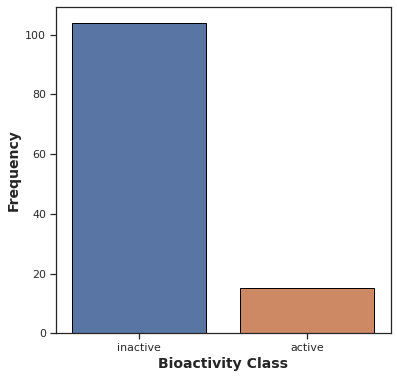

In [124]:
# Frequency plot comparing the two bioactivity classes(Active and Inactive)
plt.figure(figsize=(6,6))
sns.countplot(x='bioactivity_class',data=df2_class,edgecolor='black')
plt.xlabel('Bioactivity Class',fontsize=14, fontweight= 'bold')
plt.ylabel('Frequency',fontsize=14, fontweight='bold')
plt.savefig('bioactivity_class_plot.pdf')

Scatter Plot of Molecular Weight vs LogP

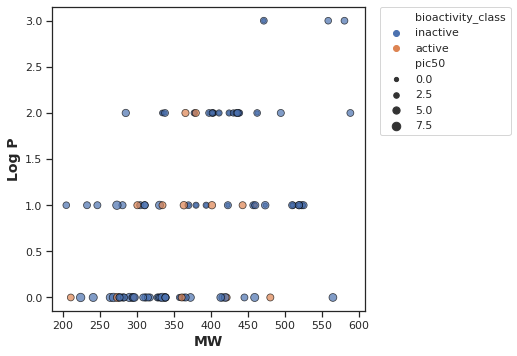

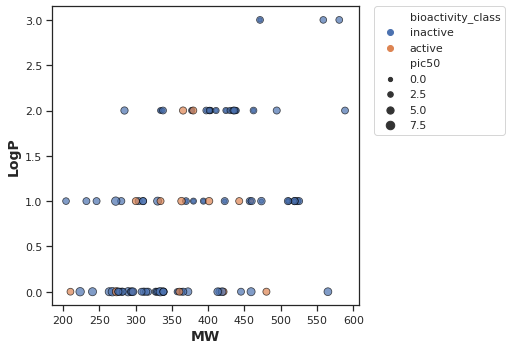

In [136]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MolWeight', y='LogP', data=df2_class, hue='bioactivity_class', size='pic50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')